# 一些额外操作

## 预设

In [4]:
import sys
import os
import openpyxl
import csv
import re
import pandas as pd
import jieba
import jieba.posseg as psg
import jieba.analyse as analyse
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cn2an
import functools
import sys
sys.path.append("..")
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from utils import *

In [2]:
StopWordPath = '../setting/stopwords.txt'
InFilePath = '../setting/停用词.xlsx'
ExtraDictionaryPath = '../setting/dict.txt'
KeywordTopNumber = 10
minLengthOfWord = 3
DictFilePath = '../data/西安城市形象编码词表.pkl'
OldDictFilePath = '../data/西安城市形象编码词表221128.pkl'
DataFilePath = '../data/西安城市形象数据_关键词.pkl'


In [5]:
# 支持中文
print(matplotlib.matplotlib_fname())
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    if 'Song' in i:
        print(i)
plt.rcParams['font.sans-serif'] = ['Songti SC'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# 显示清晰
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/zack/.pyenv/versions/3.11.0/envs/NLP_Basic/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc
Songti SC


## 数据读取

In [5]:
data = pd.read_pickle(DataFilePath)

In [8]:
dict_data = pd.read_pickle(DictFilePath)
# old_dict_data = pd.read_pickle(OldDictFilePath)

In [65]:
weibo = pd.read_csv("../data/西安微博.csv")
weibo.rename(columns={'微博正文': '内容', 'user_id': 'user_tag'}, inplace=True)
weibo = weibo[['user_tag', '内容', '转发数', '评论数', '点赞数', '发布时间']]
weibo['平台'] = '微博'

In [75]:
weibo_add = pd.read_csv("../data/西安微博补充.csv")
weibo_add.rename(columns={'微博正文': '内容', 'user_id': 'user_tag'}, inplace=True)
weibo_add = weibo_add[['user_tag', '内容', '转发数', '评论数', '点赞数', '发布时间']]
weibo_add['平台'] = '微博'

## 数据处理

In [70]:
weibo['发布日'] = weibo['发布时间'].apply(search_time_string).dt.strftime('%Y-%m-%d')
weibo['发布月'] = weibo['发布时间'].apply(search_time_string).dt.strftime('%Y-%m')

In [76]:
weibo_add['发布日'] = weibo_add['发布时间'].apply(search_time_string).dt.strftime('%Y-%m-%d')
weibo_add['发布月'] = weibo_add['发布时间'].apply(search_time_string).dt.strftime('%Y-%m')

## 数据展示

In [9]:
dict_data

,政治环境,经济发展,生态建设,文化风俗,重大事件,司法治安,医疗卫生,基础设施,科教文艺,休闲娱乐,社会民生,市民样貌,积极判断框架,消极判断框架,事件框架,细节框架
0,能量,规模,绿色,碑林,冠军,犯罪,精准,道路,技术,精彩,陪伴,爱心,能量,差距,宝鸡,陪伴
1,全力,突破,绿化,兵马俑,大赛,曝光,本土,建筑,科技,风景,优惠,公益,全力,挑战,布局,措施
2,中华,产业,暴雨,博物馆,仪式,事发,病毒,街道,人才,美景,优先,热情,中华,应急,部门,调整
3,专家,地产,大风,博物院,比赛,事故,病例,市区,艺术,美食,优质,志愿,专家,暴雨,地区,报告
4,祖国,分公司,高温,鼓楼,大会,违法,病人,铁路,文艺,夜景,动力,志愿者,祖国,大风,地域,负责人
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,市长,NaN,NaN,NaN,NaN,NaN,NaN,NaN,数学,网红,大爷,NaN,文化,NaN,工程,软骨
90,干部,NaN,NaN,NaN,NaN,NaN,NaN,NaN,离校,网友,待遇,NaN,人文,NaN,经济,鼻子
91,领导,NaN,NaN,NaN,NaN,NaN,NaN,NaN,舍友,游客,单身,NaN,文化底蕴,NaN,企业,口罩
92,形势,NaN,NaN,NaN,NaN,NaN,NaN,NaN,舞蹈,直播,弟弟,NaN,信任,NaN,合作,磨骨


In [19]:
dict_data.notna().sum().sum()

1044

In [20]:
old_dict_data.notna().sum().sum()

1044

In [112]:
get_app_group_counts(weibo[weibo['发布月']=='2022-01'], '发布日')

发布日
2022-01-01    208
2022-01-02    279
2022-01-03    278
2022-01-04    277
2022-01-05    262
2022-01-06     44
2022-01-07    262
2022-01-08    271
2022-01-09    278
2022-01-10    257
2022-01-11    275
2022-01-12    188
2022-01-13     75
2022-01-14    246
2022-01-15    256
2022-01-16    261
2022-01-17    281
2022-01-18    283
2022-01-19    269
2022-01-23    177
2022-01-26    241
2022-01-27    261
2022-01-28    230
Name: user_tag, dtype: Int64

In [89]:
w = weibo_count[weibo_count < 1500]

In [90]:
w = w.reindex()

In [101]:
weibo_count

Series([], Name: user_tag, dtype: Int64)

## 可视化

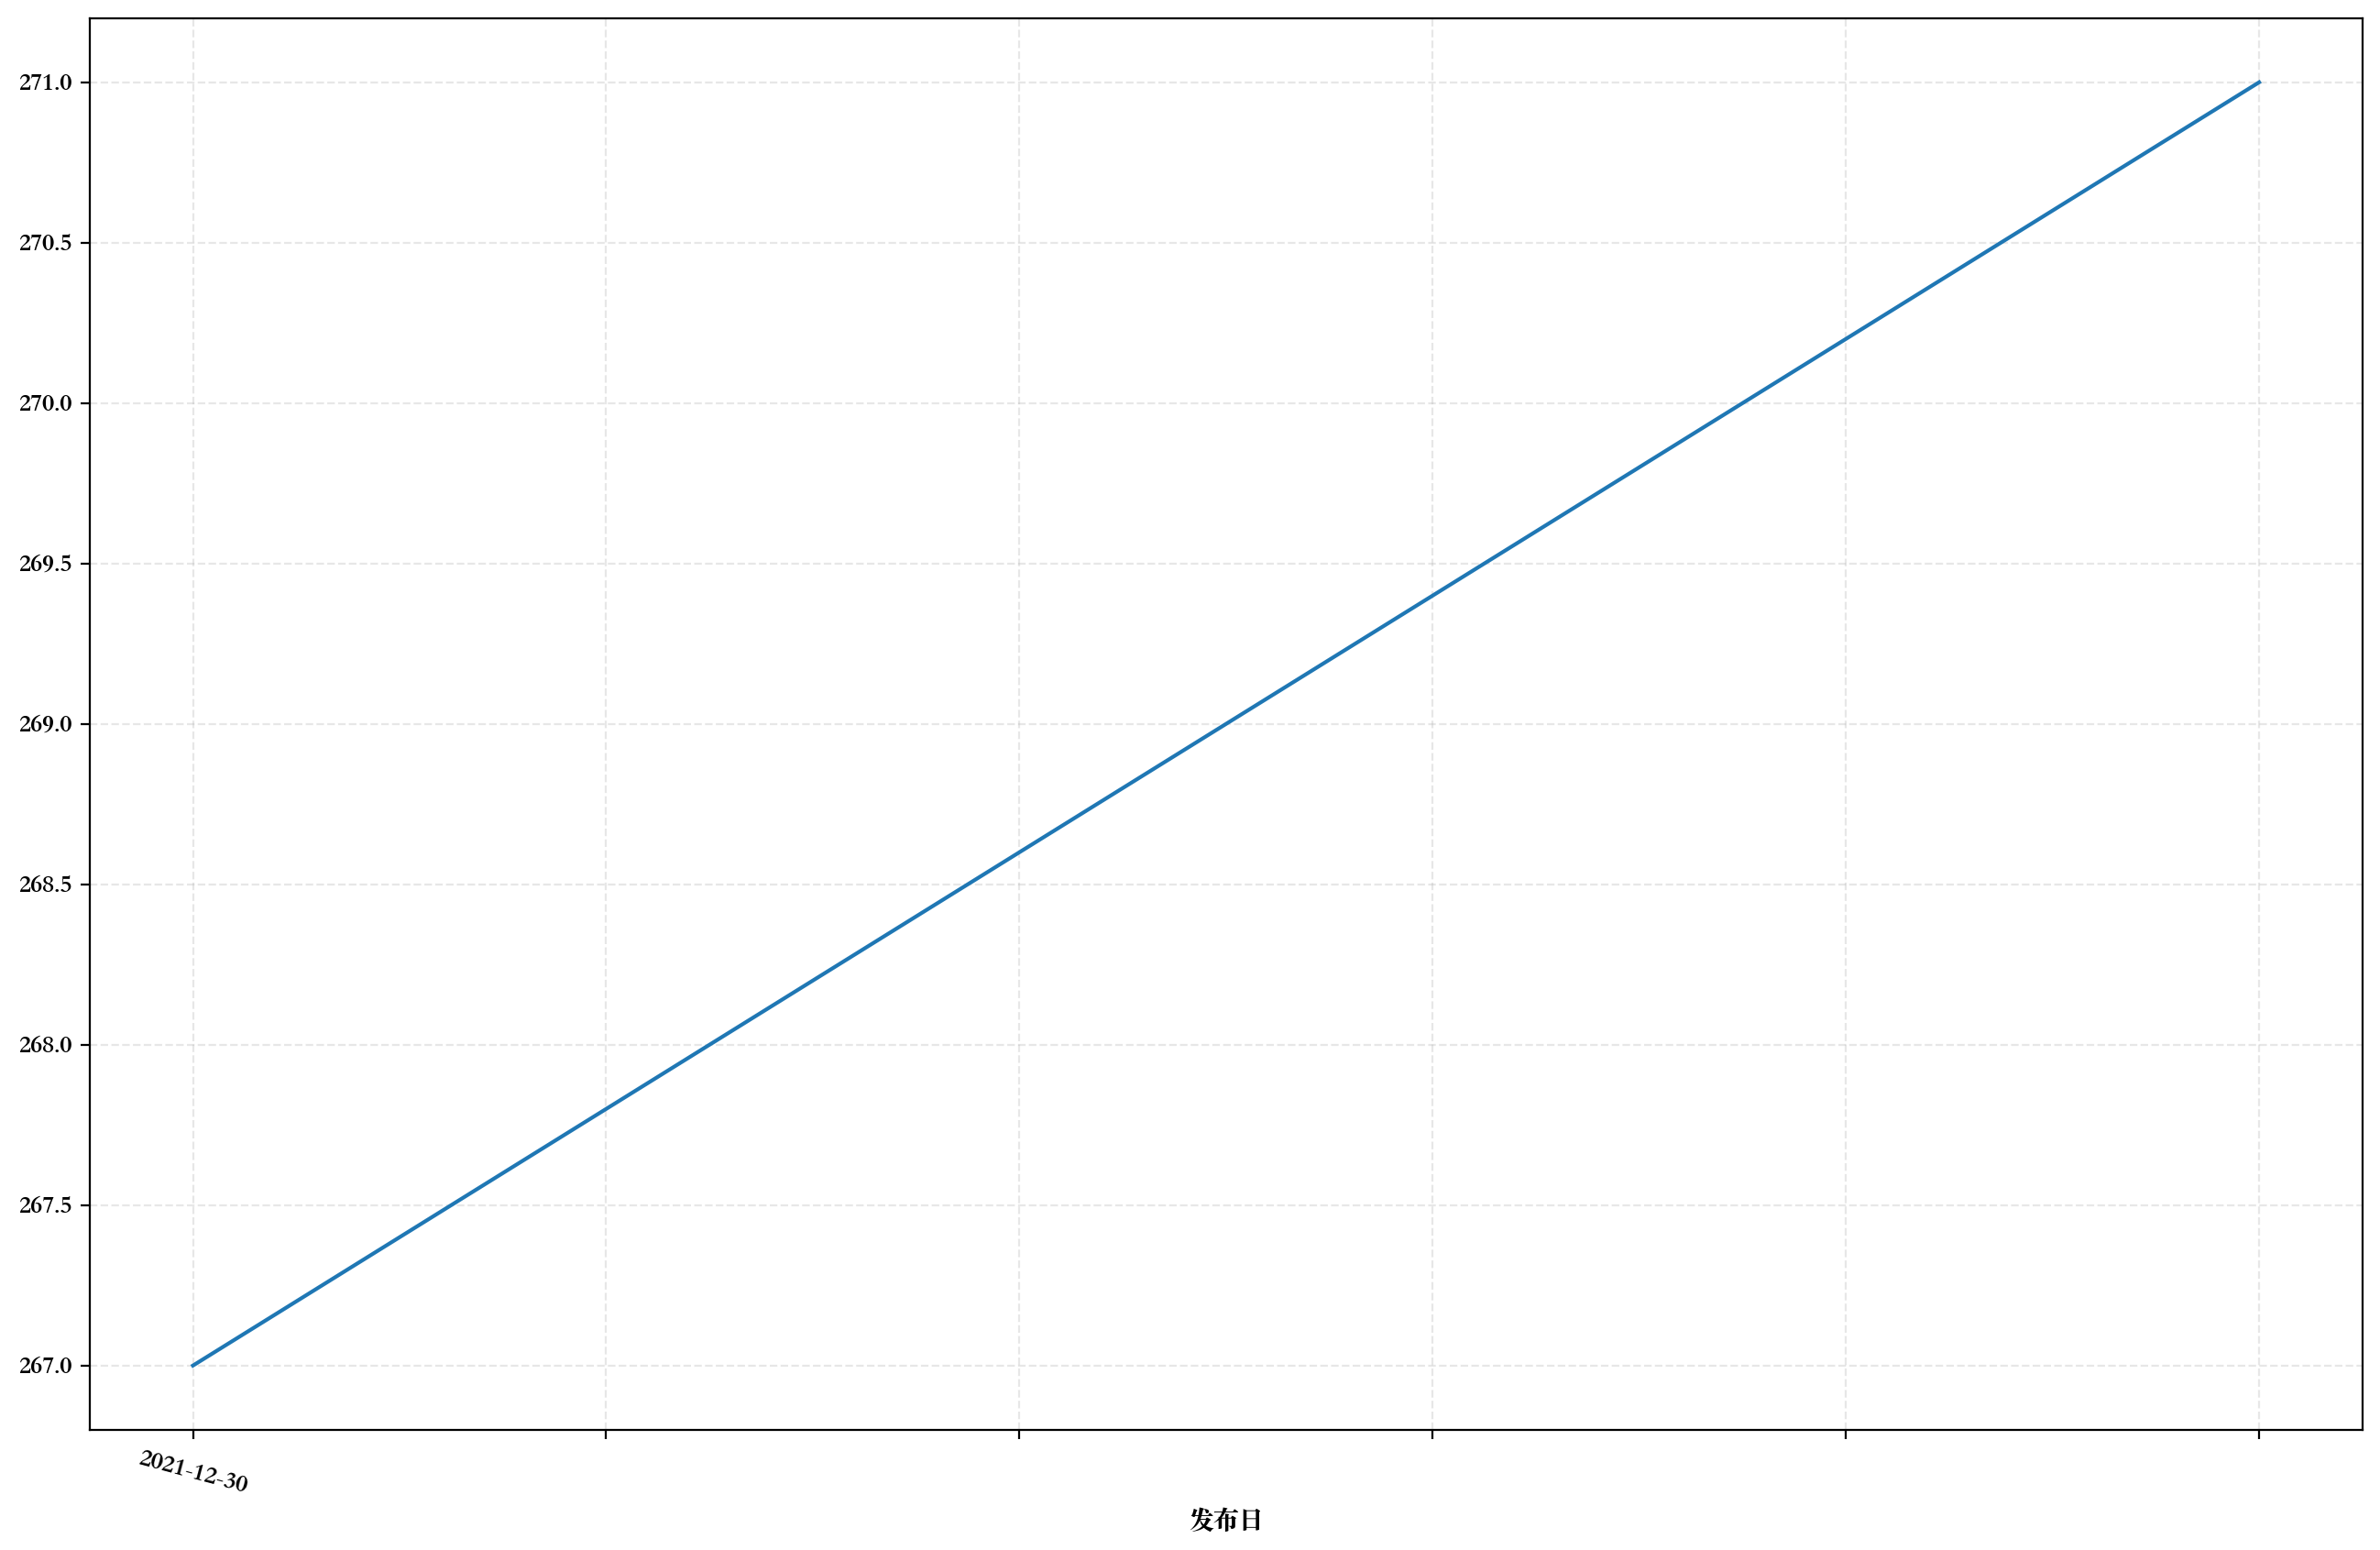

In [82]:
ax = weibo_count.plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
# plt.xlim(('2017-12-11', '2021-07-31'))
# plt.xticks(pd.date_range(start ='2021-11', end = '2022-9', freq='M'))
plt.xticks(rotation=-15) 
plt.show()

## 数据保存

In [45]:
w.to_excel(get_new_path(InFilePath,'count'))